In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

### Image basics

In [2]:
# reading
img = cv2.imread("../images/sample.png")

In [3]:
img.shape

(1200, 1200, 3)

It returns a tuple of the number of rows, columns, and channels (if the image is color)

If an image is grayscale, the tuple returned contains only the number of rows and columns, so it is a good method to check whether the loaded image is grayscale or color.

In [4]:
img.size # total number of pixels

4320000

In [5]:
img.dtype

dtype('uint8')

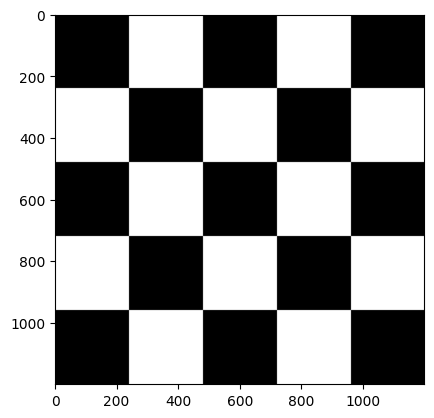

In [6]:
# displaying
plt.imshow(img)
plt.show()

In [11]:
im = Image.fromarray(np.uint8(img)).convert('RGB')

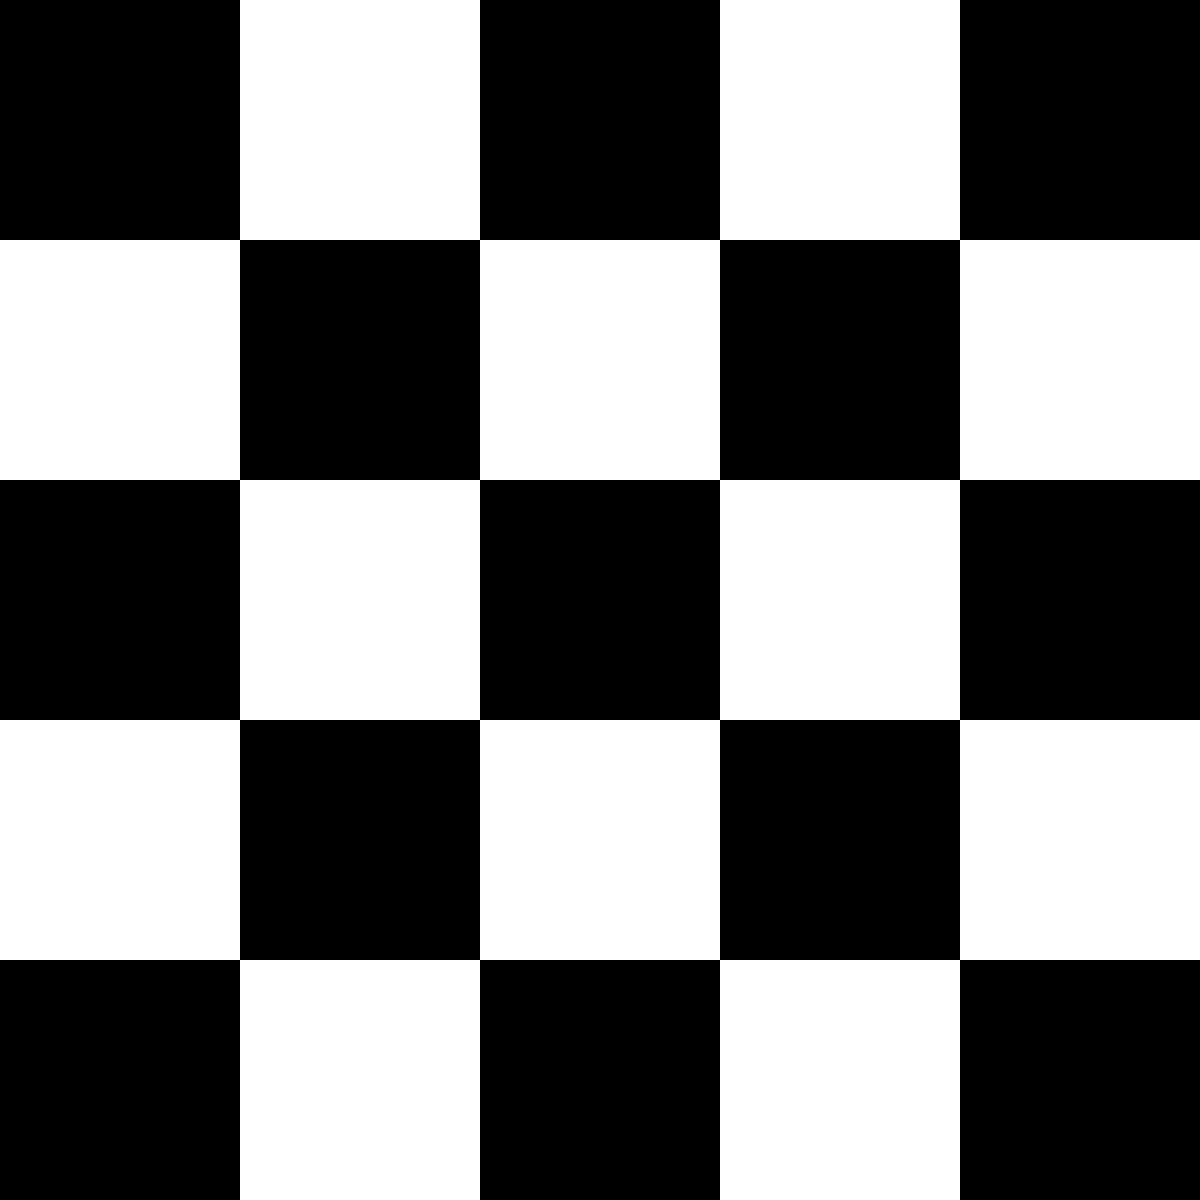

In [12]:
im.show()

In [7]:
target_file = "../images/sample_write.png"

In [8]:
# writing
cv2.imwrite(target_file, img)

True

### Video basics

In [3]:
cap = cv2.VideoCapture('../videos/sample.mp4')

In [ ]:
while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
        
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    cv2.imshow(frame)
    
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

### Color space conversion

The quality of light in a given environment is absolutely crucial in obtaining your goals (**the most important factor**)

Lighting conditions should have 3 primary goals
1. **High contrast**: seek to maximize the contrast between the Regions of Interest in your image
2. **Generalizable**: should be consistent enough that they work well from one object to the next
3. **Stable**


- **Color space**: specific organization of colors that allow us to consistently represent and reproduce colors
- **Color model**: abstract method of numerically representing colors in the color space

In [68]:
img = cv2.imread("../images/apple.jpg")

By default, the image is saved in the BGR color space

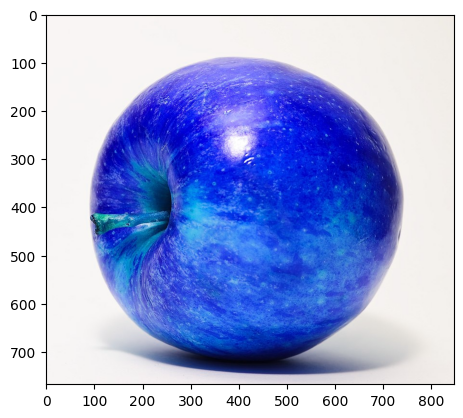

In [69]:
plt.imshow(img)
plt.show()

#### Grayscale

Grayscale images are single channel images with pixel values in the range [0, 255] (i.e., 256 unique values).

True black and white images are called binary images and thus only have two possible values: 0 or 255 (i.e., only 2 unique values).

In [70]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

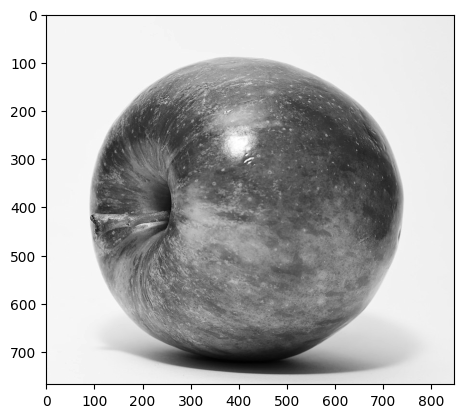

In [71]:
plt.imshow(img_gray, cmap="gray")
plt.show()

#### RGB

Colors are represented as combinations of Red, Green, and Blue components

Each Red, Green, and Blue channel can have values defined in the range [0, 255] (for a total of 256 “shades”), where 0 indicates no representation and 255 demonstrates full representation.

In [72]:
from IPython.display import HTML

color_table_html = """
<table style="color: black" class="wikitable">
  <tbody>
    <tr>
      <td style="background:#FFCCCC;">#FFCCCC </td>
      <td style="background:#FFC0C0;">#FFC0C0 </td>
      <td style="background:#FF9999;">#FF9999 </td>
      <td style="background:#FF8080;">#FF8080 </td>
      <td style="background:#FF6666;">#FF6666 </td>
      <td style="background:#FF4040;color:#FFFFFF;">#FF4040 </td>
      <td style="background:#FF3333;color:#FFFFFF;">#FF3333 </td>
      <td style="background:#FF0000;color:#FFFFFF;">
        <b>#FF0000</b>
      </td>
    </tr>
    <tr>
      <td style="background:#FFE5CC;">#FFE5CC </td>
      <td style="background:#FFE0C0;">#FFE0C0 </td>
      <td style="background:#FFCC99;">#FFCC99 </td>
      <td style="background:#FFC080;">#FFC080 </td>
      <td style="background:#FFB266;">#FFB266 </td>
      <td style="background:#FFA040;">#FFA040 </td>
      <td style="background:#FF9933;color:#FFFFFF;">#FF9933 </td>
      <td style="background:#FF8000;color:#FFFFFF;">
        <b>#FF8000</b>
      </td>
    </tr>
    <tr>
      <td style="background:#FFFFCC;">#FFFFCC </td>
      <td style="background:#FFFFC0;">#FFFFC0 </td>
      <td style="background:#FFFF99;">#FFFF99 </td>
      <td style="background:#FFFF80;">#FFFF80 </td>
      <td style="background:#FFFF66;">#FFFF66 </td>
      <td style="background:#FFFF40;">#FFFF40 </td>
      <td style="background:#FFFF33;">#FFFF33 </td>
      <td style="background:#FFFF00;">
        <b>#FFFF00</b>
      </td>
    </tr>
    <tr>
      <td style="background:#FFFFE5;">#FFFFE5 </td>
      <td style="background:#FFFFE0;">#FFFFE0 </td>
      <td style="background:#FFFFCC;">#FFFFCC </td>
      <td style="background:#FFFFC0;">#FFFFC0 </td>
      <td style="background:#FFFFB2;">#FFFFB2 </td>
      <td style="background:#FFFFA0;">#FFFFA0 </td>
      <td style="background:#FFFF99;">#FFFF99 </td>
      <td style="background:#FFFF80;">#FFFF80 </td>
    </tr>
    <tr>
      <td style="background:#E5FFCC;">#E5FFCC </td>
      <td style="background:#E0FFC0;">#E0FFC0 </td>
      <td style="background:#CCFF99;">#CCFF99 </td>
      <td style="background:#C0FFA0;">#C0FFA0 </td>
      <td style="background:#B2FF66;">#B2FF66 </td>
      <td style="background:#A0FF40;">#A0FF40 </td>
      <td style="background:#99FF33;">#99FF33 </td>
      <td style="background:#80FF00;">
        <b>#80FF00</b>
      </td>
    </tr>
    <tr>
      <td style="background:#CCFFCC;">#CCFFCC </td>
      <td style="background:#C0FFC0;">#C0FFC0 </td>
      <td style="background:#99FF99;">#99FF99 </td>
      <td style="background:#80FF80;">#80FF80 </td>
      <td style="background:#66FF66;">#66FF66 </td>
      <td style="background:#40FF40;">#40FF40 </td>
      <td style="background:#33FF33;">#33FF33 </td>
      <td style="background:#00FF00;color:#FFFFFF;">
        <b>#00FF00</b>
      </td>
    </tr>
    <tr>
      <td style="background:#E5FFE5;">#E5FFE5 </td>
      <td style="background:#E0FFE0;">#E0FFE0 </td>
      <td style="background:#CCFFCC;">#CCFFCC </td>
      <td style="background:#C0FFC0;">#C0FFC0 </td>
      <td style="background:#B2FFB2;">#B2FFB2 </td>
      <td style="background:#A0FFA0;">#A0FFA0 </td>
      <td style="background:#99FF99;">#99FF99 </td>
      <td style="background:#80FF80;">#80FF80 </td>
    </tr>
    <tr>
      <td style="background:#CCE5CC;">#CCE5CC </td>
      <td style="background:#C0E0C0;">#C0E0C0 </td>
      <td style="background:#99CC99;">#99CC99 </td>
      <td style="background:#80C080;">#80C080 </td>
      <td style="background:#66B266;">#66B266 </td>
      <td style="background:#40A040;color:#FFFFFF;">#40A040 </td>
      <td style="background:#339933;color:#FFFFFF;">#339933 </td>
      <td style="background:#008000;color:#FFFFFF;">
        <b>#008000</b>
      </td>
    </tr>
    <tr>
      <td style="background:#CCFFE5;">#CCFFE5 </td>
      <td style="background:#C0FFE0;">#C0FFE0 </td>
      <td style="background:#99FFCC;">#99FFCC </td>
      <td style="background:#80FFC0;">#80FFC0 </td>
      <td style="background:#66FFB2;">#66FFB2 </td>
      <td style="background:#40FFA0;">#40FFA0 </td>
      <td style="background:#33FF99;">#33FF99 </td>
      <td style="background:#00FF80;color:#FFFFFF;">
        <b>#00FF80</b>
      </td>
    </tr>
    <tr>
      <td style="background:#CCFFFF;">#CCFFFF </td>
      <td style="background:#C0FFFF;">#C0FFFF </td>
      <td style="background:#99FFFF;">#99FFFF </td>
      <td style="background:#80FFFF;">#80FFFF </td>
      <td style="background:#66FFFF;">#66FFFF </td>
      <td style="background:#40FFFF;">#40FFFF </td>
      <td style="background:#33FFFF;">#33FFFF </td>
      <td style="background:#00FFFF;color:#FFFFFF;">
        <b>#00FFFF</b>
      </td>
    </tr>
    <tr>
      <td style="background:#E5FFFF;">#E5FFFF </td>
      <td style="background:#E0FFFF;">#E0FFFF </td>
      <td style="background:#CCFFFF;">#CCFFFF </td>
      <td style="background:#C0FFFF;">#C0FFFF </td>
      <td style="background:#B2FFFF;">#B2FFFF </td>
      <td style="background:#A0FFFF;">#A0FFFF </td>
      <td style="background:#99FFFF;">#99FFFF </td>
      <td style="background:#80FFFF;">#80FFFF </td>
    </tr>
    <tr>
      <td style="background:#CCE5E5;">#CCE5E5 </td>
      <td style="background:#C0E0E0;">#C0E0E0 </td>
      <td style="background:#99CCCC;">#99CCCC </td>
      <td style="background:#80C0C0;">#80C0C0 </td>
      <td style="background:#66B2B2;">#66B2B2 </td>
      <td style="background:#40A0A0;color:#FFFFFF;">#40A0A0 </td>
      <td style="background:#339999;color:#FFFFFF;">#339999 </td>
      <td style="background:#008080;color:#FFFFFF;">
        <b>#008080</b>
      </td>
    </tr>
    <tr>
      <td style="background:#CCE5FF;">#CCE5FF </td>
      <td style="background:#C0E0FF;">#C0E0FF </td>
      <td style="background:#99CCFF;">#99CCFF </td>
      <td style="background:#80C0FF;">#80C0FF </td>
      <td style="background:#66B2FF;">#66B2FF </td>
      <td style="background:#40A0FF;color:#FFFFFF;">#40A0FF </td>
      <td style="background:#3399FF;color:#FFFFFF;">#3399FF </td>
      <td style="background:#0080FF;color:#FFFFFF;">
        <b>#0080FF</b>
      </td>
    </tr>
    <tr>
      <td style="background:#CCCCFF;">#CCCCFF </td>
      <td style="background:#C0C0FF;">#C0C0FF </td>
      <td style="background:#9999FF;">#9999FF </td>
      <td style="background:#8080FF;">#8080FF </td>
      <td style="background:#6666FF;">#6666FF </td>
      <td style="background:#4040FF;color:#FFFFFF;">#4040FF </td>
      <td style="background:#3333FF;color:#FFFFFF;">#3333FF </td>
      <td style="background:#0000FF;color:#FFFFFF;">
        <b>#0000FF</b>
      </td>
    </tr>
    <tr>
      <td style="background:#CCCCE5;">#CCCCE5 </td>
      <td style="background:#C0C0E0;">#C0C0E0 </td>
      <td style="background:#9999CC;">#9999CC </td>
      <td style="background:#8080C0;">#8080C0 </td>
      <td style="background:#6666B2;">#6666B2 </td>
      <td style="background:#4040A0;color:#FFFFFF;">#4040A0 </td>
      <td style="background:#333399;color:#FFFFFF;">#333399 </td>
      <td style="background:#000080;color:#FFFFFF;">
        <b>#000080</b>
      </td>
    </tr>
    <tr>
      <td style="background:#E5E5FF;">#E5E5FF </td>
      <td style="background:#E0E0FF;">#E0E0FF </td>
      <td style="background:#CCCCFF;">#CCCCFF </td>
      <td style="background:#C0C0FF;">#C0C0FF </td>
      <td style="background:#B2B2FF;">#B2B2FF </td>
      <td style="background:#A0A0FF;">#A0A0FF </td>
      <td style="background:#9999FF;">#9999FF </td>
      <td style="background:#8080FF;">#8080FF </td>
    </tr>
    <tr>
      <td style="background:#E5CCFF;">#E5CCFF </td>
      <td style="background:#E0C0FF;">#E0C0FF </td>
      <td style="background:#CC99FF;">#CC99FF </td>
      <td style="background:#C080FF;">#C080FF </td>
      <td style="background:#B266FF;">#B266FF </td>
      <td style="background:#A040FF;color:#FFFFFF;">#A040FF </td>
      <td style="background:#9933FF;color:#FFFFFF;">#9933FF </td>
      <td style="background:#8000FF;color:#FFFFFF;">
        <b>#8000FF</b>
      </td>
    </tr>
    <tr>
      <td style="background:#E5CCE5;">#E5CCE5 </td>
      <td style="background:#E0C0E0;">#E0C0E0 </td>
      <td style="background:#CC99CC;">#CC99CC </td>
      <td style="background:#C080C0;">#C080C0 </td>
      <td style="background:#B266B2;">#B266B2 </td>
      <td style="background:#A040A0;color:#FFFFFF;">#A040A0 </td>
      <td style="background:#993399;color:#FFFFFF;">#993399 </td>
      <td style="background:#800080;color:#FFFFFF;">
        <b>#800080</b>
      </td>
    </tr>
    <tr>
      <td style="background:#FFCCFF;">#FFCCFF </td>
      <td style="background:#FFC0FF;">#FFC0FF </td>
      <td style="background:#FF99FF;">#FF99FF </td>
      <td style="background:#FF80FF;">#FF80FF </td>
      <td style="background:#FF66FF;">#FF66FF </td>
      <td style="background:#FF40FF;color:#FFFFFF;">#FF40FF </td>
      <td style="background:#FF33FF;color:#FFFFFF;">#FF33FF </td>
      <td style="background:#FF00FF;color:#FFFFFF;">
        <b>#FF00FF</b>
      </td>
    </tr>
    <tr>
      <td style="background:#FFE5FF;">#FFE5FF </td>
      <td style="background:#FFE0FF;">#FFE0FF </td>
      <td style="background:#FFCCFF;">#FFCCFF </td>
      <td style="background:#FFC0FF;">#FFC0FF </td>
      <td style="background:#FFB2FF;">#FFB2FF </td>
      <td style="background:#FFA0FF;">#FFA0FF </td>
      <td style="background:#FF99FF;">#FF99FF </td>
      <td style="background:#FF80FF;">#FF80FF </td>
    </tr>
    <tr>
      <td style="background:#FFCCE5;">#FFCCE5 </td>
      <td style="background:#FFC0E0;">#FFC0E0 </td>
      <td style="background:#FF99CC;">#FF99CC </td>
      <td style="background:#FF80C0;">#FF80C0 </td>
      <td style="background:#FF66B2;">#FF66B2 </td>
      <td style="background:#FF40A0;color:#FFFFFF;">#FF40A0 </td>
      <td style="background:#FF3399;color:#FFFFFF;">#FF3399 </td>
      <td style="background:#FF0080;color:#FFFFFF;">
        <b>#FF0080</b>
      </td>
    </tr>
    <tr>
      <td style="background:#FFE5E5;">#FFE5E5 </td>
      <td style="background:#FFE0E0;">#FFE0E0 </td>
      <td style="background:#FFCCCC;">#FFCCCC </td>
      <td style="background:#FFC0C0;">#FFC0C0 </td>
      <td style="background:#FFB2B2;">#FFB2B2 </td>
      <td style="background:#FFA0A0;">#FFA0A0 </td>
      <td style="background:#FF9999;">#FF9999 </td>
      <td style="background:#FF8080;">#FF8080 </td>
    </tr>
    <tr>
      <td style="background:#E5CCCC;">#E5CCCC </td>
      <td style="background:#E0C0C0;">#E0C0C0 </td>
      <td style="background:#CC9999;">#CC9999 </td>
      <td style="background:#C08080;">#C08080 </td>
      <td style="background:#B26666;">#B26666 </td>
      <td style="background:#A04040;color:#FFFFFF;">#A04040 </td>
      <td style="background:#993333;color:#FFFFFF;">#993333 </td>
      <td style="background:#800000;color:#FFFFFF;">
        <b>#800000</b>
      </td>
    </tr>
    <tr>
      <td style="background:#E5E5CC;">#E5E5CC </td>
      <td style="background:#E0E0C0;">#E0E0C0 </td>
      <td style="background:#CCCC99;">#CCCC99 </td>
      <td style="background:#C0C080;">#C0C080 </td>
      <td style="background:#B2B266;">#B2B266 </td>
      <td style="background:#A0A040;color:#FFFFFF;">#A0A040 </td>
      <td style="background:#999933;color:#FFFFFF;">#999933 </td>
      <td style="background:#808000;color:#FFFFFF;">
        <b>#808000</b>
      </td>
    </tr>
    <tr>
      <td style="background:#E5E5E5;">#E5E5E5 </td>
      <td style="background:#E0E0E0;">#E0E0E0 </td>
      <td style="background:#CCCCCC;">#CCCCCC </td>
      <td style="background:#C0C0C0;">#C0C0C0 </td>
      <td style="background:#B2B2B2;">#B2B2B2 </td>
      <td style="background:#A0A0A0;color:#FFFFFF;">#A0A0A0 </td>
      <td style="background:#999999;color:#FFFFFF;">#999999 </td>
      <td style="background:#808080;color:#FFFFFF;">
        <b>#808080</b>
      </td>
    </tr>
  </tbody>
</table>
"""

HTML(color_table_html)

In [74]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

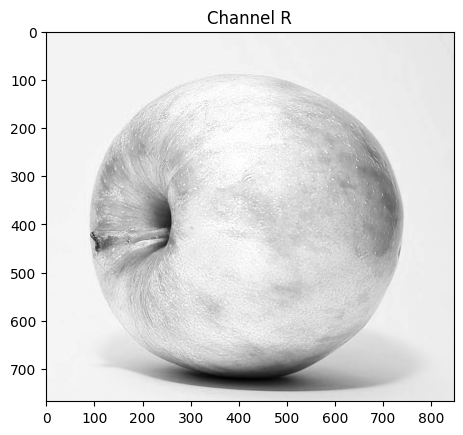

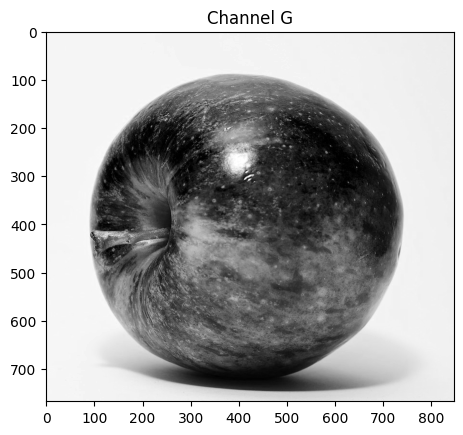

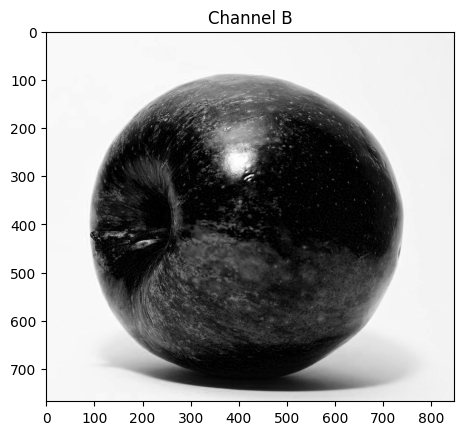

In [84]:
for (name, channel) in zip(("R", "G", "B"), cv2.split(img_rgb)):
    plt.imshow(channel, cmap="gray")
    plt.title(f"Channel {name}") 
    plt.show()

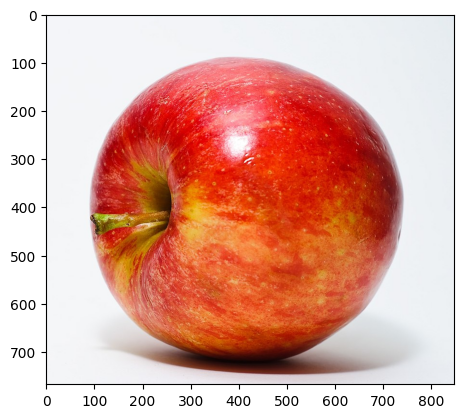

In [75]:
plt.imshow(img_rgb)
plt.show()

#### HSV

HSV separates color information into three components: Hue, Saturation, and Value (brightness)

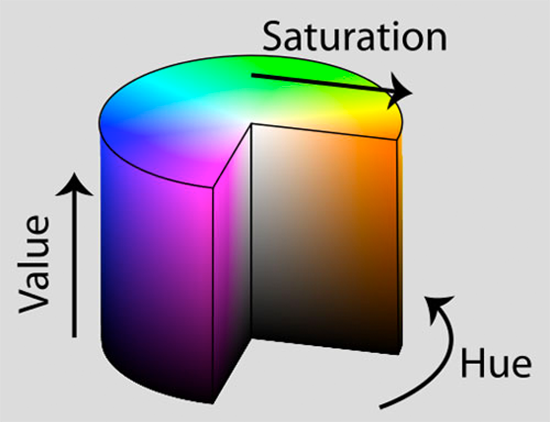!

- **Hue**: Which "pure" color we are examining. For example, all shadows and tones of the color "red" will have the same Hue.
- **Saturation**: How "white" the color is. A fully saturated color would be "pure," as in "pure red." And a color with zero saturation would be pure white.
- **Value**: The Value allows us to control the lightness of our color. A Value of zero would indicate pure black, whereas increasing the value would produce lighter colors.

In [76]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

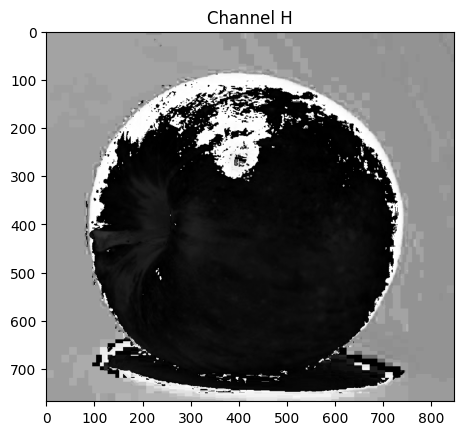

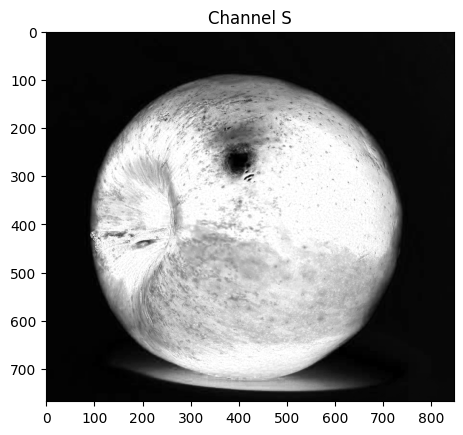

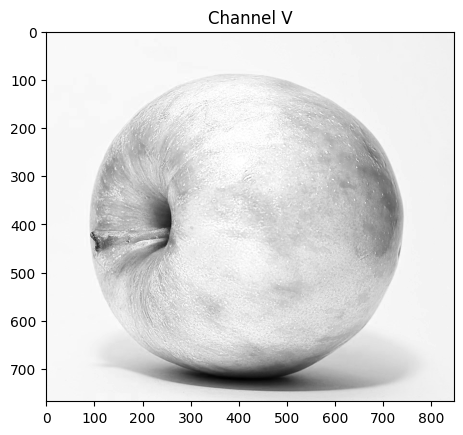

In [77]:
for (name, channel) in zip(("H", "S", "V"), cv2.split(img_hsv)):
    plt.imshow(channel, cmap='gray')
    plt.title(f"Channel {name}") 
    plt.show()

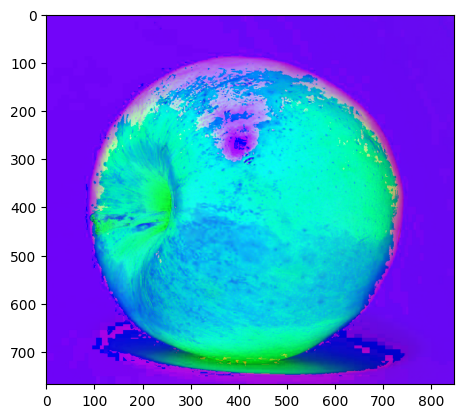

In [78]:
plt.imshow(img_hsv)
plt.show()

#### L\*a\*b\*

Its goal is to mimic the methodology in which humans see and interpret color.

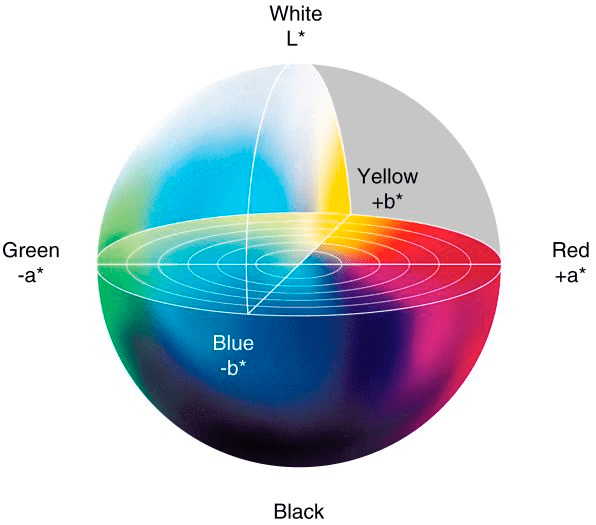

Essentially, the L\*a\*b\* color space is a 3-axis system:
1. **L-channel**: The "lightness" of the pixel. This value goes up and down the vertical axis, white to black, with neutral grays at the center of the axis.
2. **a-channel**: Originates from the center of the L-channel and defines pure green on one end of the spectrum and pure red on the other.
3. **b-channel**: Also originates from the center of the L-channel, but is perpendicular to the a-channel. The b-channel defines pure blue at one of the spectrum and pure yellow at the other.

In [79]:
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

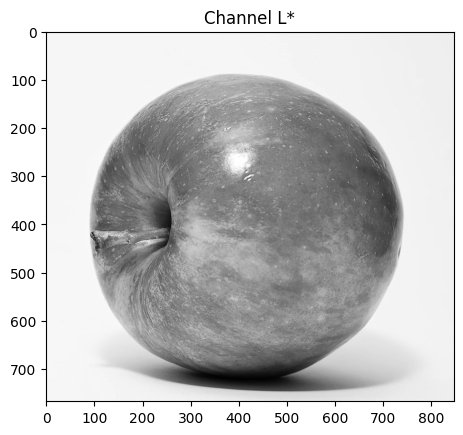

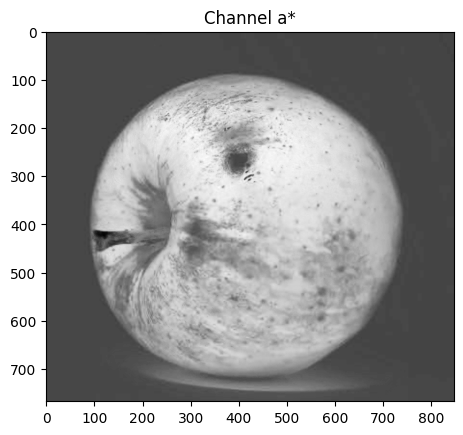

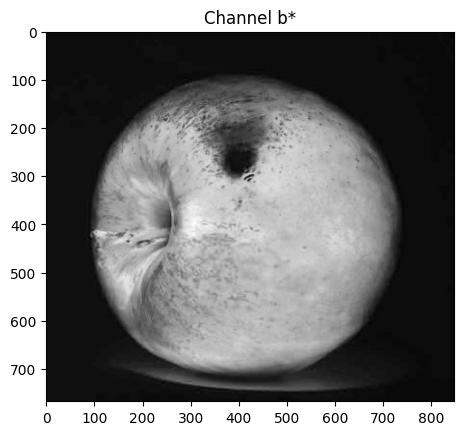

In [81]:
for (name, channel) in zip(("L*", "a*", "b*"), cv2.split(img_lab)):
    plt.imshow(channel, cmap='gray')
    plt.title(f"Channel {name}") 
    plt.show()

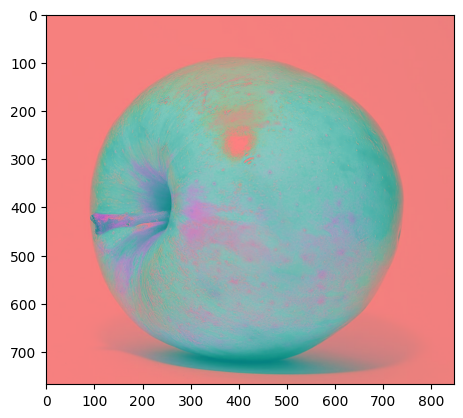

In [82]:
plt.imshow(img_lab)
plt.show()

### Basic image manipulation

In [108]:
img = cv2.imread('../images/apple.jpg', cv2.IMREAD_UNCHANGED)

In [109]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#### Resizing

**Preserve Aspect Ratio**

In [115]:
def resize_with_aspect_ratio(img: np.array, scale: int):
    if len(img.shape) == 3:
        row, col, channel = img.shape
    else:
        row, col = img.shape
        
    interpolation = cv2.INTER_AREA if scale <= 100 else cv2.INTER_LINEAR
    
    width = int(col * scale / 100)
    height = int(row * scale / 100)
    
    return cv2.resize(img, (width, height), interpolation) 

**Downscale**

img_resized_50 = resize_with_aspect_ratio(img, scale=50)

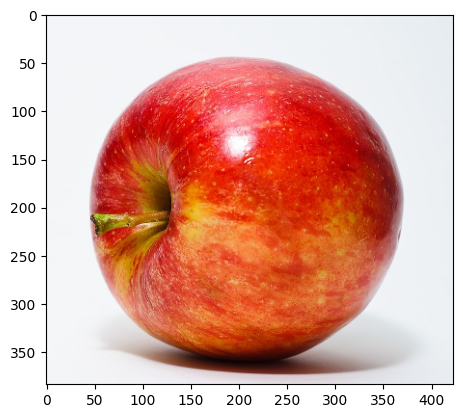

In [117]:
plt.imshow(img_resized_50)
plt.show()

**Upscale**

In [118]:
img_resized_150 = resize_with_aspect_ratio(img, scale=150)

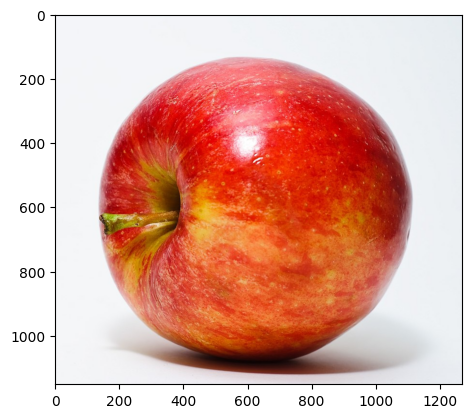

In [119]:
plt.imshow(img_resized_150)
plt.show()

**Specific width and height**

In [125]:
def resize_width_and_height(img: np.array, width: int = None, height: int = None):
    if len(img.shape) == 3:
        row, col, channel = img.shape
    else:
        row, col = img.shape
    
    _width = width or col
    _height = height or row
    
    return cv2.resize(img, (_width, _height), interpolation=cv2.INTER_LINEAR) 

In [128]:
img_resize_300x200 = resize_width_and_height(img, width=300, height=200)

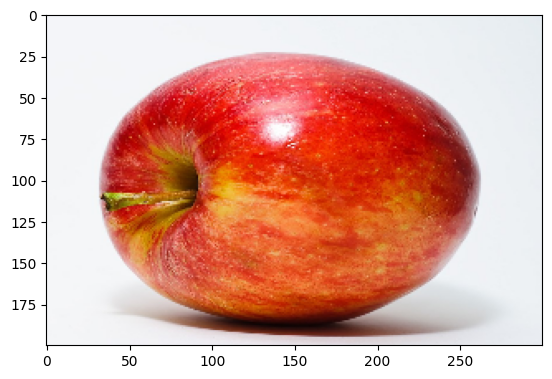

In [129]:
plt.imshow(img_resize_300x200)
plt.show()

#### Cropping - Region of Interest (ROI)

In [136]:
img_crop = img[300:550, 80:300] # rows, cols  

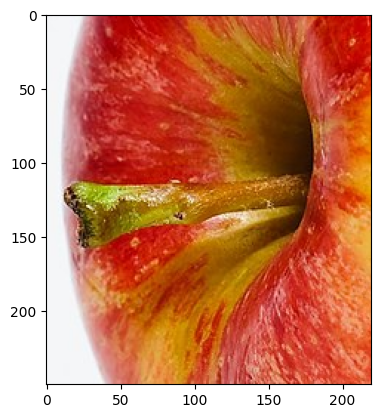

In [137]:
plt.imshow(img_crop)
plt.show()

#### Annotating

**Line**

In [146]:
img_annotate = img.copy()

In [150]:
pointA, pointB = (80, 400), (750, 400)

In [151]:
img_line = cv2.line(img_annotate, pointA, pointB, (0, 0, 255), thickness=3, lineType=cv2.LINE_AA)

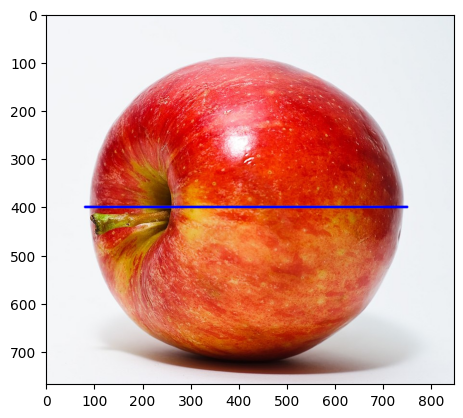

In [152]:
plt.imshow(img_line)
plt.show()

**Circle**

Change the thickness argument to -1 if you want to fill this circle now with a solid color

In [180]:
img_annotate = img.copy()

In [181]:
center, radius  = (400,400), 320

In [182]:
img_circle = cv2.circle(img_annotate, center, radius, (0, 0, 255), thickness=3, lineType=cv2.LINE_AA)

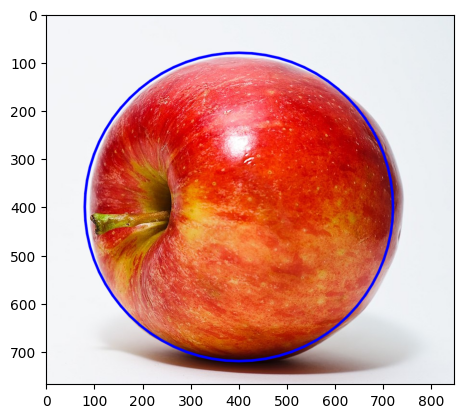

In [183]:
plt.imshow(img_circle)
plt.show()

**Rectangle**

In [192]:
img_annotate = img.copy()

In [193]:
pointA, pointB = (80, 100), (750, 720)

In [194]:
img_rectangle = cv2.rectangle(img_annotate, pointA, pointB, (0, 0, 255), thickness=3, lineType=cv2.LINE_AA)

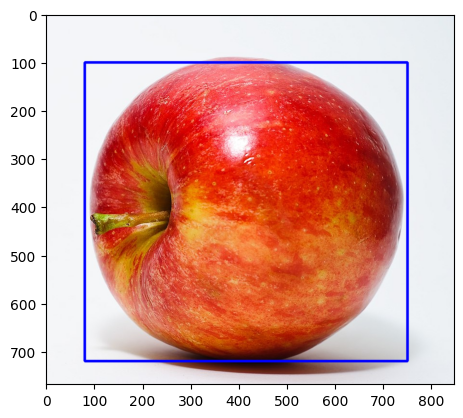

In [195]:
plt.imshow(img_rectangle)
plt.show()

**Ellipse**

In [234]:
img_annotate = img.copy()

In [235]:
center, axis1, axis2  = (400,400), (340, 300), (320, 300)

In [236]:
img_ellipse = cv2.ellipse(img_annotate, center, axis1, 0, 0, 360, (0, 0, 255), thickness=3)

In [237]:
img_ellipse = cv2.ellipse(img_annotate, center, axis2, 90, 0, 360, (0, 255, 0), thickness=3)

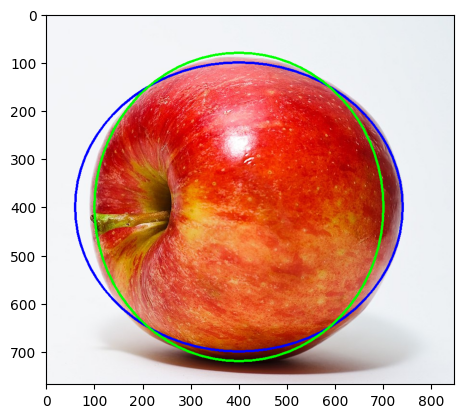

In [238]:
plt.imshow(img_ellipse)
plt.show()

**Text**

In [247]:
img_annotate = img.copy()

In [248]:
text, point = "An Apple", (100, 80)

In [249]:
img_text = cv2.putText(img_annotate, text, point, fontFace = cv2.FONT_HERSHEY_DUPLEX, fontScale = 1.5, color = (0,0,255))

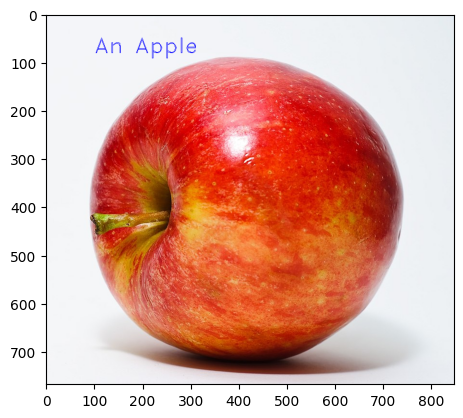

In [250]:
plt.imshow(img_text)
plt.show()

#### Transforming

**Rotation**

In [259]:
def rotate(img: np.array, angle: int):
    if len(img.shape) == 3:
        row, col, channel = img.shape
    else:
        row, col = img.shape
        
    center = (col // 2, row // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale=1)
    return cv2.warpAffine(img, rotation_matrix, (col, row))

In [257]:
img_rotate_45 = rotate(img, angle=45)

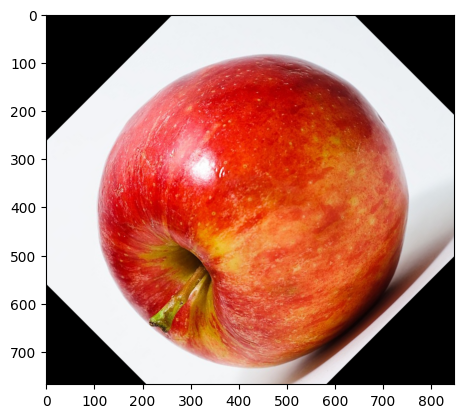

In [258]:
plt.imshow(img_rotate_45)
plt.show()

**Translation**

In [267]:
def translate(img: np.array, x: int, y: int):
    if len(img.shape) == 3:
        row, col, channel = img.shape
    else:
        row, col = img.shape
        
    translation_matrix = np.array([
        [1, 0, x],
        [0, 1, y],
    ], dtype=np.float32)
    
    return cv2.warpAffine(img, translation_matrix, (col, row))

In [268]:
img_translate_100x50y = translate(img, x=100, y=50)

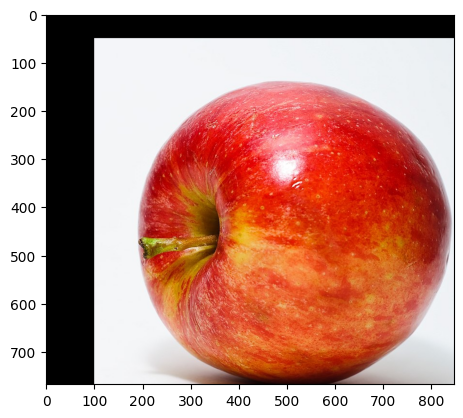

In [269]:
plt.imshow(img_translate_100x50y)
plt.show()

In [272]:
img_translate_neg100x0y = translate(img, x=-100, y=0)

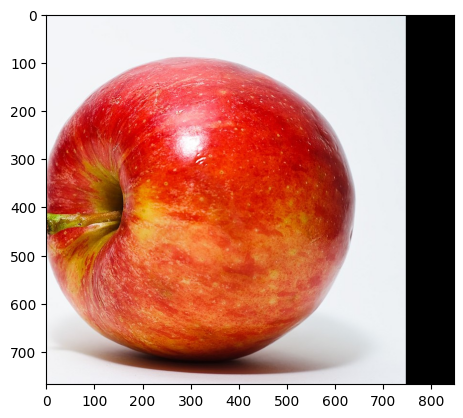

In [273]:
plt.imshow(img_translate_neg100x0y)
plt.show()